In [6]:
import sys
sys.path.insert(0, 'Resources/MagicCube/code/')
import matplotlib.pyplot as plt

from cube import *

In [7]:
colors = ["White","Yellow","Blue","Green","Orange","Red"]

In [8]:
def numCompleteFaces(c):
    
    nf = 0
    
    nFaces = 6
    
    for i in range(nFaces):
        if np.sum(c.stickers[i] != c.stickers[i,0,0]) == 0:
            nf += 1
            
    return nf

In [26]:
class Edge:
    
    def __init__(self,point1,point2):
        
        self.point1 = point1
        self.point2 = point2
        
    def isDone(self,c):
        #Is this edge done in the cube c?
        return c.stickers[self.point1[0],int(c.N/2),int(c.N/2)] == c.stickers[self.point1] \
            and c.stickers[self.point2[0],int(c.N/2),int(c.N/2)] == c.stickers[self.point2]
        

In [34]:
class Corner:
    
    def __init__(self,point1,point2,point3):
        
        self.point1 = point1
        self.point2 = point2
        self.point3 = point3
        
    def isDone(self,c):
        
        return c.stickers[self.point1[0],int(c.N/2),int(c.N/2)] == c.stickers[self.point1] \
            and c.stickers[self.point2[0],int(c.N/2),int(c.N/2)] == c.stickers[self.point2] \
            and c.stickers[self.point3[0],int(c.N/2),int(c.N/2)] == c.stickers[self.point3]
        

In [35]:
def computeEdges(c):
    
    edges = np.empty([0])
    
    for n in range(1,c.N-1):
        edges = np.append(edges,Edge((0,0,n),(5,n,-1))) #cube-ligne-colonne
        edges = np.append(edges,Edge((0,n,-1),(3,n,-1)))
        edges = np.append(edges,Edge((0,n,0),(2,n,-1)))
        edges = np.append(edges,Edge((0,-1,n),(4,n,-1)))
        edges = np.append(edges,Edge((3,-1,n),(5,0,n)))
        edges = np.append(edges,Edge((3,0,n),(4,-1,n)))
        edges = np.append(edges,Edge((4,0,n),(2,-1,n)))
        edges = np.append(edges,Edge((2,0,n),(5,-1,n)))
        edges = np.append(edges,Edge((1,n,-1),(2,n,0)))
        edges = np.append(edges,Edge((1,n,0),(3,n,0)))
        edges = np.append(edges,Edge((1,0,n),(5,n,0)))
        edges = np.append(edges,Edge((1,-1,n),(4,n,0)))
        
        
    return edges

In [36]:
def computeCorners(c):
    
    corners = np.empty([0])
    
    corners = np.append(corners,Corner((0,0,0),(2,0,-1),(5,-1,-1)))
    corners = np.append(corners,Corner((2,0,0),(1,0,-1),(5,-1,0)))
    corners = np.append(corners,Corner((1,0,0),(3,-1,0),(5,0,0)))
    corners = np.append(corners,Corner((1,-1,0),(4,-1,0),(3,0,0)))
    corners = np.append(corners,Corner((1,-1,-1),(2,-1,0),(4,0,0)))
    corners = np.append(corners,Corner((0,0,-1),(5,0,-1),(3,-1,-1)))
    corners = np.append(corners,Corner((0,-1,-1),(4,-1,-1),(3,0,-1)))
    corners = np.append(corners,Corner((0,-1,0),(4,0,-1),(2,-1,-1)))
        
        
    return corners

In [37]:
def numCompleteEdges(c,edges):
    
    ne = 0
    
    for e in edges:
        if e.isDone(c):
            ne += 1
            
    return ne

In [41]:
def numCompleteCorners(c,corners):
    
    nc = 0
    
    for co in corners:
        if co.isDone(c):
            nc += 1
            
    return nc

In [42]:
def randomMove(c,number): # Random but does not move the centers. Not neccesary at this point.
    
    for t in range(number):
        f = c.dictface[np.random.randint(6)]
        
        l = int(c.N/2)
        while l == int(c.N/2):
            l = np.random.randint(c.N)
            
        d = 2*np.random.randint(2)-1
        c.move(f, l, d)

~ <h1> Tests </h1>

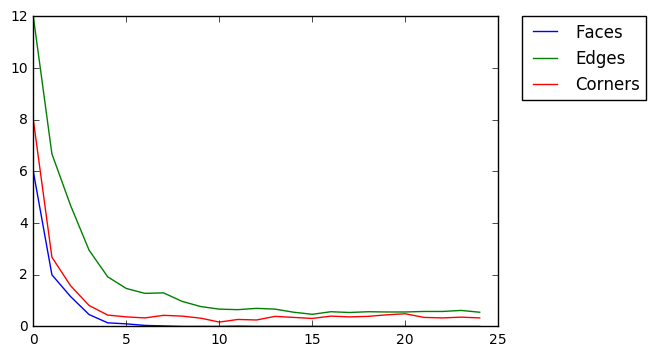

Final number of faces, should be 0:	 0.0
Final number of edges, should be 1/2:	 0.56
Final number of corners, should be 1/3:	 0.378


In [43]:
Ncubes = 100
Nmoves = 25

ncftot = np.zeros([Nmoves])
ncetot = np.zeros([Nmoves])
ncctot = np.zeros([Nmoves])

for n in range(Ncubes):
    
    c = Cube(3)
    edges = computeEdges(c)
    corners = computeCorners(c)
    
    ncf = np.empty([0])
    nce = np.empty([0])
    ncc = np.empty([0])

    for i in range(Nmoves):

        ncf = np.append(ncf,numCompleteFaces(c))
        nce = np.append(nce,numCompleteEdges(c,edges))
        ncc = np.append(ncc,numCompleteCorners(c,corners))
    #     randomMove(c,1)
        c.randomize(1)
        
    ncftot += ncf
    ncetot += nce
    ncctot += ncc
    
plt.plot(ncftot/Ncubes, 'b', label = "Faces")
plt.plot(ncetot/Ncubes, 'g', label = "Edges")
plt.plot(ncctot/Ncubes, 'r', label = "Corners")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("Final number of faces, should be 0:\t",np.mean(ncftot[-10:]/Ncubes))
print("Final number of edges, should be 1/2:\t",np.mean(ncetot[-10:]/Ncubes))
print("Final number of corners, should be 1/3:\t",np.mean(ncctot[-10:]/Ncubes))

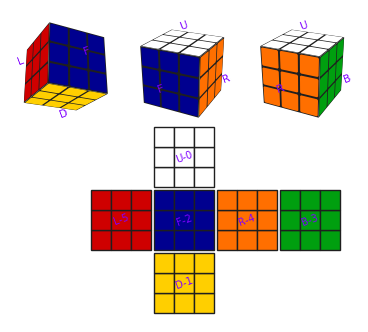

6 12 8
Now turn faces (without modifying the cube)


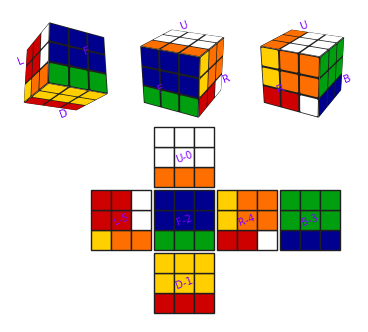

0 5 2
Going back


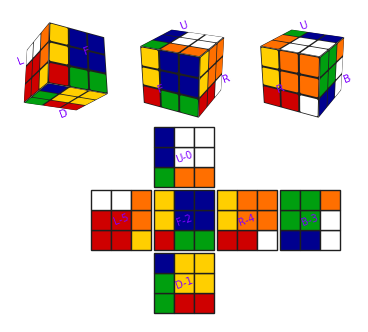

0 3 1
c.move("U",3,1) produces an error, as expected


In [44]:
c = Cube(3)
edges = computeEdges(c)
corners = computeCorners(c)
# c.render(flat=False)
# c.render(views=False)
# plt.show()
# print("Now all")
c.render()
plt.show()
print(numCompleteFaces(c),numCompleteEdges(c,edges),numCompleteCorners(c,corners))
print("Now turn faces (without modifying the cube)")
# c.move("L",0,1) #moves the layer 0 (second argument), 1 time (third argument) by 90° clock-wise, parallel to face "U"
# randomMove(c,2)
c.randomize(2)
c.render()
plt.show()
print(numCompleteFaces(c),numCompleteEdges(c,edges),numCompleteCorners(c,corners))
print("Going back") #the third argument is defined with modulo 4: for instance -1 = 3
c.move("L",0,-1, verbose = True) #moves the layer 0 (second argument), -1 time (third argument), parallel to face "U"
c.render()
plt.show()
print(numCompleteFaces(c),numCompleteEdges(c,edges),numCompleteCorners(c,corners))
print('c.move("U",3,1) produces an error, as expected')

How to turn the view point, i.e. change the name of the faces


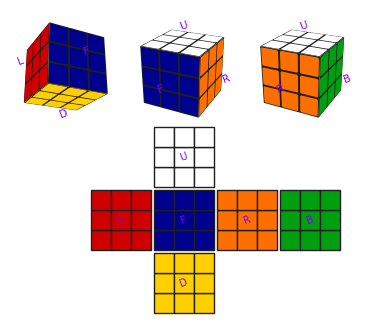

moved U 0 2
moved U 1 2
moved U 2 2


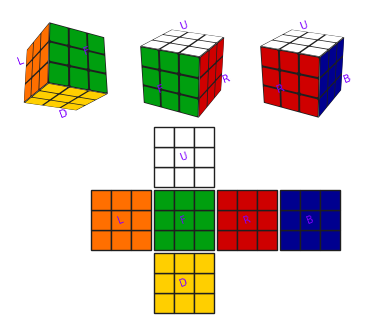

the sequence of actions is quite clear for the instruction


In [86]:
print("How to turn the view point, i.e. change the name of the faces")
c = Cube(3)
c.render()
plt.show()
c.turn("U",2)
c.render()
plt.show()
print("the sequence of actions is quite clear for the instruction")